In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [83]:
import numpy 
from pandas import read_csv 
from sklearn.metrics import mean_squared_error
from math import sqrt
from math import log
from math import exp
from scipy.stats import boxcox 
from pandas import DataFrame
from pandas import Grouper
from pandas import Series
from pandas import concat
from pandas.plotting import lag_plot
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.gofplots import qqplot
series = read_csv('Data_csv.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head())

            SP500  Dividend  Earnings  Consumer Price Index  Long Interest Rate  Real Price  Real Dividend  Real Earnings   PE10
Date                                                                                                                            
1881-01-01   6.19      0.27      0.49                  9.42                3.70      164.18           7.03          12.89  18.47
1881-02-01   6.17      0.27      0.48                  9.51                3.69      162.01           7.09          12.65  18.15
1881-03-01   6.24      0.28      0.48                  9.51                3.69      163.85           7.22          12.54  18.27
1881-04-01   6.22      0.28      0.47                  9.61                3.68      161.71           7.28          12.31  17.95
1881-05-01   6.50      0.28      0.47                  9.51                3.67      170.68           7.48          12.32  18.87


In [84]:
print(series.describe())

             SP500     Dividend     Earnings  Consumer Price Index  Long Interest Rate   Real Price  Real Dividend  Real Earnings         PE10
count  1644.000000  1644.000000  1644.000000           1644.000000         1644.000000  1644.000000    1644.000000    1644.000000  1644.000000
mean    270.951886     5.948266    13.717032             60.682530            4.559465   532.709568      15.758029      31.386776    16.814221
std     514.527711     9.711107    24.463934             71.654323            2.367001   542.212359       8.282715      24.035416     6.701090
min       3.810000     0.180000     0.160000              6.280000            1.500000    87.630000       6.220000       4.190000     4.780000
25%       8.530000     0.460000     0.657500             10.280000            3.180000   179.557500       9.080000      14.167500    11.787500
50%      21.460000     1.025000     2.350000             23.850000            3.740000   274.115000      13.570000      23.365000    16.160000

In [80]:
series=series.reset_index()

In [69]:
print("start date ",series['Date'].min())
print("End date ",series['Date'].max())

start date  1881-01-01 00:00:00
End date  2017-12-01 00:00:00


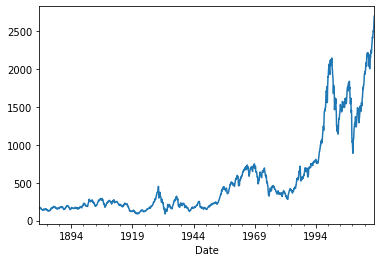

In [73]:
series['Real Price'].plot()
pyplot.show()

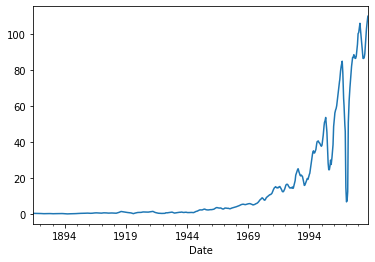

In [87]:
series['Earnings'].plot()
pyplot.show()


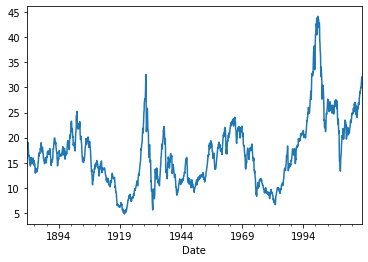

In [88]:
series['PE10'].plot()
pyplot.show()



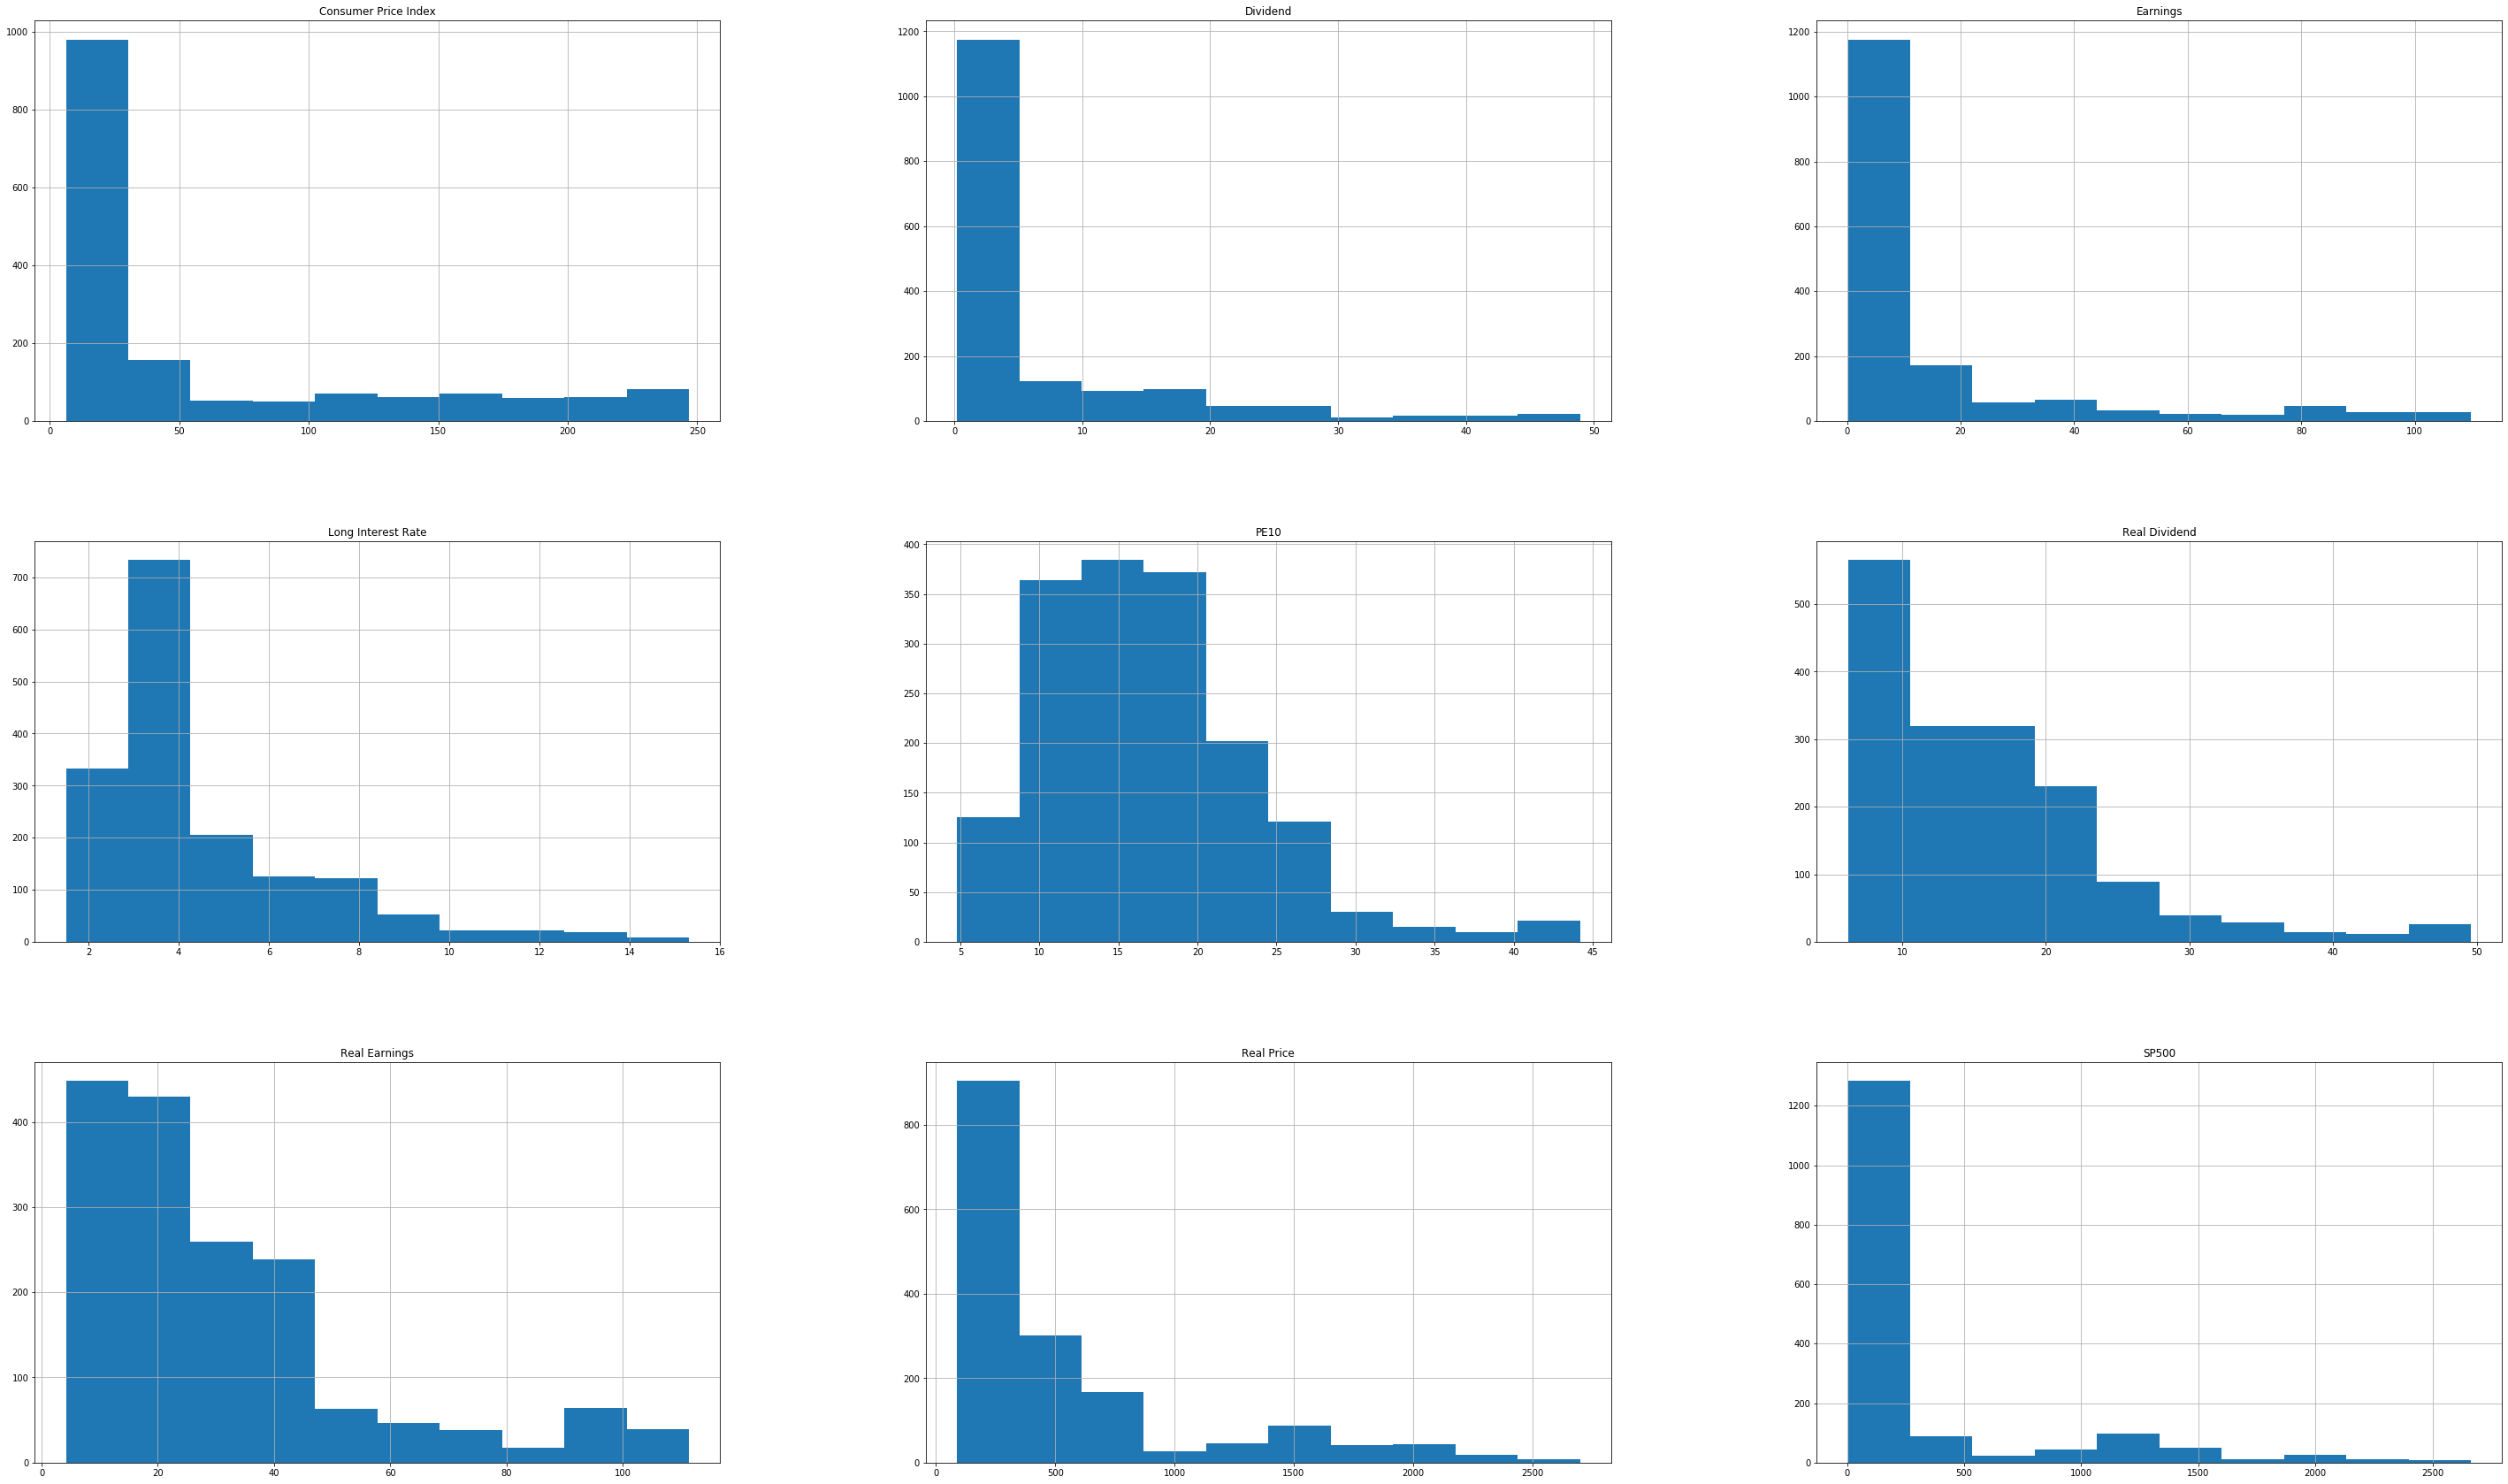

In [96]:
series.hist(figsize=(50, 30));

In [102]:
print(series.corr())

                         SP500  Dividend  Earnings  Consumer Price Index  Long Interest Rate  Real Price  Real Dividend  Real Earnings      PE10
SP500                 1.000000  0.971986  0.962216              0.921462           -0.045623    0.967143       0.884308       0.887706  0.659468
Dividend              0.971986  1.000000  0.956857              0.945909            0.036521    0.924944       0.928877       0.887425  0.549415
Earnings              0.962216  0.956857  1.000000              0.916747            0.015205    0.917928       0.876777       0.945198  0.567657
Consumer Price Index  0.921462  0.945909  0.916747              1.000000            0.218994    0.910865       0.893304       0.884492  0.552770
Long Interest Rate   -0.045623  0.036521  0.015205              0.218994            1.000000    0.036015       0.170953       0.177470 -0.152412
Real Price            0.967143  0.924944  0.917928              0.910865            0.036015    1.000000       0.910677       0.90

In [105]:
series_transpose=series.T

In [106]:
series_transpose

Date,1881-01-01,1881-02-01,1881-03-01,1881-04-01,1881-05-01,1881-06-01,1881-07-01,1881-08-01,1881-09-01,1881-10-01,1881-11-01,1881-12-01,1882-01-01,1882-02-01,1882-03-01,1882-04-01,1882-05-01,1882-06-01,1882-07-01,1882-08-01,1882-09-01,1882-10-01,1882-11-01,1882-12-01,1883-01-01,1883-02-01,1883-03-01,1883-04-01,1883-05-01,1883-06-01,1883-07-01,1883-08-01,1883-09-01,1883-10-01,1883-11-01,1883-12-01,1884-01-01,1884-02-01,1884-03-01,1884-04-01,1884-05-01,1884-06-01,1884-07-01,1884-08-01,1884-09-01,1884-10-01,1884-11-01,1884-12-01,1885-01-01,1885-02-01,1885-03-01,1885-04-01,1885-05-01,1885-06-01,1885-07-01,1885-08-01,1885-09-01,1885-10-01,1885-11-01,1885-12-01,1886-01-01,1886-02-01,1886-03-01,1886-04-01,1886-05-01,1886-06-01,1886-07-01,1886-08-01,1886-09-01,1886-10-01,1886-11-01,1886-12-01,1887-01-01,1887-02-01,1887-03-01,1887-04-01,1887-05-01,1887-06-01,1887-07-01,1887-08-01,1887-09-01,1887-10-01,1887-11-01,1887-12-01,1888-01-01,1888-02-01,1888-03-01,1888-04-01,1888-05-01,1888-06-01,1888-07-01,1888-08-01,1888-09-01,1888-10-01,1888-11-01,1888-12-01,1889-01-01,1889-02-01,1889-03-01,1889-04-01,1889-05-01,1889-06-01,1889-07-01,1889-08-01,1889-09-01,1889-10-01,1889-11-01,1889-12-01,1890-01-01,1890-02-01,1890-03-01,1890-04-01,1890-05-01,1890-06-01,1890-07-01,1890-08-01,1890-09-01,1890-10-01,1890-11-01,1890-12-01,1891-01-01,1891-02-01,1891-03-01,1891-04-01,1891-05-01,1891-06-01,1891-07-01,1891-08-01,1891-09-01,1891-10-01,1891-11-01,1891-12-01,1892-01-01,1892-02-01,1892-03-01,1892-04-01,1892-05-01,1892-06-01,1892-07-01,1892-08-01,1892-09-01,1892-10-01,1892-11-01,1892-12-01,1893-01-01,1893-02-01,1893-03-01,1893-04-01,1893-05-01,1893-06-01,1893-07-01,1893-08-01,1893-09-01,1893-10-01,1893-11-01,1893-12-01,1894-01-01,1894-02-01,1894-03-01,1894-04-01,1894-05-01,1894-06-01,1894-07-01,1894-08-01,1894-09-01,1894-10-01,1894-11-01,1894-12-01,1895-01-01,1895-02-01,1895-03-01,1895-04-01,1895-05-01,1895-06-01,1895-07-01,1895-08-01,1895-09-01,1895-10-01,1895-11-01,1895-12-01,1896-01-01,1896-02-01,1896-03-01,1896-04-01,1896-05-01,1896-06-01,1896-07-01,1896-08-01,1896-09-01,1896-10-01,1896-11-01,1896-12-01,1897-01-01,1897-02-01,1897-03-01,1897-04-01,1897-05-01,1897-06-01,1897-07-01,1897-08-01,1897-09-01,1897-10-01,1897-11-01,1897-12-01,1898-01-01,1898-02-01,1898-03-01,1898-04-01,1898-05-01,1898-06-01,1898-07-01,1898-08-01,1898-09-01,1898-10-01,1898-11-01,1898-12-01,1899-01-01,1899-02-01,1899-03-01,1899-04-01,1899-05-01,1899-06-01,1899-07-01,1899-08-01,1899-09-01,1899-10-01,1899-11-01,1899-12-01,1900-01-01,1900-02-01,1900-03-01,1900-04-01,1900-05-01,1900-06-01,1900-07-01,1900-08-01,1900-09-01,1900-10-01,1900-11-01,1900-12-01,1901-01-01,1901-02-01,1901-03-01,1901-04-01,1901-05-01,1901-06-01,1901-07-01,1901-08-01,1901-09-01,1901-10-01,...,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01,1998-07-01,1998-08-01,1998-09-01,1998-10-01,1998-11-01,1998-12-01,1999-01-01,1999-02-01,1999-03-01,1999-04-01,1999-05-01,1999-06-01,1999-07-01,1999-08-01,1999-09-01,1999-10-01,1999-11-01,1999-12-01,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,2000-11-01,2000-12-01,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,2001-11-01,2001-12-01,2002-01-01,2002-02-01,2002-03-01,2002-04-01,2002-05-01,2002-06-01,2002-07-01,2002-08-01,2002-09-01,2002-10-01,2002-11-01,2002-12-01,2003-01-01,2003-02-01,2003-03-01,2003-04-01,2003-05-01,2003-06-01,2003-07-01,2003-08-01,2003-09-01,2003-10-01,2003-11-01,2003-12-01,2004-01-01,2004-02-01,2004-03-01,2004-04-01,2004-05-01,2004-06-01,2004-07-01,2004-08-01,2004-09-01,2004-10-01,2004-11-01,2004-12-01,2005-01-01,2005-02-01,2005-03-01,2005-04-01,2005-05-01,2005-06-01,2005-07-01,2005-08-01,2005-09-01,2005-10-01,2005-11-01,2005-12-01,2006-01-01,2006-02-01,2006-03-01,2006-04-01,2006-05-01,2006-06-01,2006-07-0

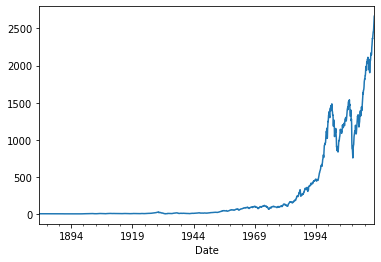

In [108]:
# Read the historical data
series_transpose.loc['SP500', ].plot();

In [169]:
series

,Date,SP500,Dividend,Earnings,Consumer Price Index,Long Interest Rate,Real Price,Real Dividend,Real Earnings,PE10
0,1881-01-01,6.19,0.27,0.49,9.42,3.70,164.18,7.03,12.89,18.47
1,1881-02-01,6.17,0.27,0.48,9.51,3.69,162.01,7.09,12.65,18.15
2,1881-03-01,6.24,0.28,0.48,9.51,3.69,163.85,7.22,12.54,18.27
3,1881-04-01,6.22,0.28,0.47,9.61,3.68,161.71,7.28,12.31,17.95
4,1881-05-01,6.50,0.28,0.47,9.51,3.67,170.68,7.48,12.32,18.87
...,...,...,...,...,...,...,...,...,...,...
1639,2017-08-01,2456.22,47.85,106.06,245.52,2.21,2499.40,48.69,107.92,29.91
1640,2017-09-01,2492.84,48.17,107.08,246.82,2.20,2523.31,48.76,108.39,30.17
1641,2017-10-01,2557.00,48.42,108.01,246.66,2.36,2589.89,49.05,109.40,30.92
1642,2017-11-01,2593.61,48.68,108.95,246.67,2.35,2626.90,49.30,110.35,31.30


In [170]:
series=series.reset_index()

Depression_period

In [192]:
#greater than the start date and smaller than the end date
mask = (series['Date'] > '1929') & (series['Date'] <= '1939')

In [193]:
Depression_period=series.loc[mask]

In [194]:
Depression_period.shape


(120, 11)

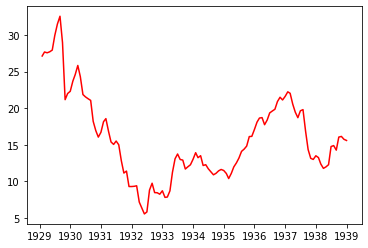

In [195]:
plt.plot(Depression_period["Date"], Depression_period["PE10"], 'r-');

stock_market crash 1973–1974 

In [196]:
#greater than the start date and smaller than the end date
mask_stock = (series['Date'] > '1973') & (series['Date'] <= '1974')
stock_market=series.loc[mask_stock]

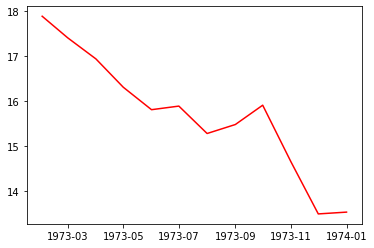

In [197]:
plt.plot(stock_market["Date"], stock_market["PE10"], 'r-');

Financial_crisis of 2007–2008

In [199]:
#greater than the start date and smaller than the end date
mask_Financial = (series['Date'] > '2007') & (series['Date'] <= '2008')
Financial_crisis=series.loc[mask_Financial]

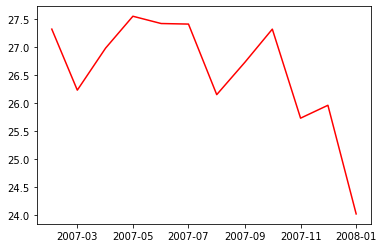

In [200]:
plt.plot(Financial_crisis["Date"], Financial_crisis["PE10"], 'r-');

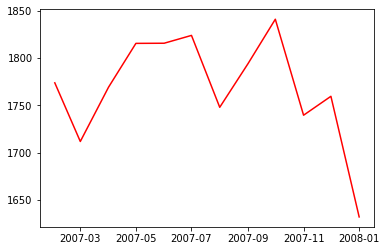

In [201]:
plt.plot(Financial_crisis["Date"], Financial_crisis["Real Price"], 'r-');

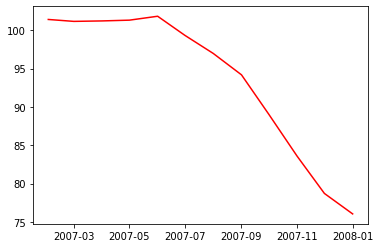

In [202]:
plt.plot(Financial_crisis["Date"], Financial_crisis["Real Earnings"], 'r-');